In [17]:
import numpy as np
import pandas as pd
import re
import codecs

In [2]:
pharse=''

#check if a number is in string
def hasNum(s):
    return any(i.isdigit() for i in s)





# get the dialog of all joker characters 
def readffile(f):
    jokertext=''
    spoken_text = ''
    name=''
    
      # read the file content

      # split the file into a list split by new line
    for line in f.split('\n'):
            #get rid of the words inside (...) and [...]
            #line = re.sub("[\(\[].*?[\)\]]", "", line)
        # split the line into a list of words
        words = line.split()

        # if there are no words set i to zero the following may be a new person
        if not words:
            i=0
            continue

            # if this line is a person identifier, do nothing
        if len(words[0]) > 1 and all([i.isupper() for i in words[0]]):
            name=' '.join(words)
            #print(name)
            spoken_text += '\n'
            continue

        
        #if the lines not empty 
        if len(line) - len(line.lstrip()) >0:
            if name == 'JOKER' :
                #get rid of the numbers
                if not hasNum(line.strip()):
                    jokertext+= line.strip() + ' '
            elif 'THE JOKER' in name:
                print(line.strip())
                if not hasNum(line.strip()) and not line.strip().isupper():
                    jokertext+= line.strip() + ' '
                
            if i==0:
                spoken_text += name+'\n'
                i+=1
                spoken_text +=  line.strip() + ' '

    #regex = re.compile(".*?\((.*?)\)")
    jokertext = re.sub("[\(\[].*?[\)\]]", "", jokertext)
    #print(jokertext)
    
    f1 = open("text-data/data.txt", "a")

    f1.write(jokertext)
    f1.close()
    #print(spoken_text)

In [3]:
#iterate through all the scripts
with codecs.open('text-data/joker.txt', 'r', 'utf8') as f:
    f = f.read()
    readffile(f)
        
with codecs.open('text-data/batman1898.txt', 'r', 'utf8') as f1:
    f1 = f1.read()
    readffile(f1)
    
with codecs.open('text-data/thedarkknight.txt', 'r', 'utf8') as f1:
    f1 = f1.read()
    readffile(f1)

In [30]:
import nltk
import bs4 as bs
import urllib.request
from nltk.corpus import stopwords

from gensim.models import Word2Vec

#print all the lines that have the emotion words in text into a text file
def print_emo(sim_word, emotion):  
    words=[]
    for i in sim_words:
        words.append(i[0])
    #print(words)
    blah = (open("text-data/data.txt").read())
    sentences = blah.split('\n')
    #print(len(sentences))

    text = ''

    for sen in sentences:
        if any(word in sen for word in words):
            #print(sen)
            text = text+sen + '\n'
    if (emotion == 'sad'):
        f1 = open("text-data/sad.txt", "a")
        f1.write(text)
        f1.close()
    if (emotion == 'happy'):
        f1 = open("text-data/happy.txt", "a")
        f1.write(text)
        f1.close()



jokertext = (open("text-data/joker.txt").read())
jokertext = jokertext.lower()
jokertext =re.sub('[^a-zA-Z]', ' ', jokertext )
jokertext = re.sub(r'\s+', ' ', jokertext)


In [31]:
allsent=nltk.sent_tokenize(jokertext)
allwords= [nltk.word_tokenize(sent) for sent in allsent]

#stopword removal
for i in range(len(allwords)):
     allwords[i] = [w for w in allwords[i] if w not in stopwords.words('english')]   

#word2vec model that finds words similar to the emotion words 
word2vec = Word2Vec(allwords, min_count=1, sg=1)
vocabulary = word2vec.wv.vocab


sim_words = word2vec.wv.most_similar('cry')
#print(sim_words)
print_emo(sim_words, 'sad')

sim_words = word2vec.wv.most_similar('frown')
#print(sim_words)
print_emo(sim_words, 'sad')

sim_words1 = word2vec.wv.most_similar('joy')
print(sim_words1)
print_emo(sim_words1, 'happy')

sim_words1 = word2vec.wv.most_similar('smile')
print(sim_words1)
print_emo(sim_words1, 'happy')




[('time', 0.999327540397644), ('playing', 0.9992882013320923), ('screaming', 0.9992437362670898), ('holding', 0.9992415308952332), ('almost', 0.9992361068725586), ('looks', 0.9992331266403198), ('toward', 0.999233067035675), ('come', 0.9992256760597229), ('eyes', 0.9992110133171082), ('still', 0.9992056488990784)]
[('old', 0.9996925592422485), ('one', 0.9996901750564575), ('back', 0.9996889233589172), ('across', 0.9996849894523621), ('hard', 0.9996796250343323), ('hears', 0.9996732473373413), ('next', 0.9996724128723145), ('file', 0.9996700286865234), ('talking', 0.9996681213378906), ('bathroom', 0.9996665716171265)]


In [20]:
#The Emotion in Text data set by CrowdFlower

df = pd.read_csv("text-data/text_emotion.csv")
emotions = df.sentiment.unique()
print(emotions)
list(df.columns)


df = df.drop('tweet_id', axis=1)
df = df.drop('author',axis=1)
df=df.dropna()

print(list(df.columns))

['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']
['sentiment', 'content']


In [21]:

def clean_tweet(row):
    row = row.lower()
    row = re.sub('http\S+|www.\S+', '', row)
    row = re.sub("@[A-Za-z0-9]+","",row)
    return row

df.replace({'content': 'http\S+|www.\S+'}, {'content':''}, regex = True)
df.replace({'content': '@[A-Za-z0-9]+'}, {'content':''}, regex = True)
df['content'].str.lower()
print(df)


        sentiment                                            content
0           empty  @tiffanylue i know  i was listenin to bad habi...
1         sadness  Layin n bed with a headache  ughhhh...waitin o...
2         sadness                Funeral ceremony...gloomy friday...
3      enthusiasm               wants to hang out with friends SOON!
4         neutral  @dannycastillo We want to trade with someone w...
...           ...                                                ...
39995     neutral                                   @JohnLloydTaylor
39996        love                     Happy Mothers Day  All my love
39997        love  Happy Mother's Day to all the mommies out ther...
39998   happiness  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...
39999        love  @mopedronin bullet train from tokyo    the gf ...

[40000 rows x 2 columns]


In [22]:
from sklearn.model_selection import train_test_split
#['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 #'hate' 'happiness' 'boredom' 'relief' 'anger']
def sent_to_num(row):
    num = 0 
    if row=='neutral':
        num = 0
    if row=='empty':
        num = 1
    if row=='sadness':
        num = 2
    if row=='enthusiasm':
        num = 3
    if row=='worry':
        num = 4
    if row=='suprise':
        num = 5
    if row=='love':
        num = 6
    if row=='fun':
        num = 7
    if row=='hate':
        num = 8
    if row=='happiness':
        num = 9
    if row=='boredom':
        num = 10
    if row=='relief':
        num = 11
    if row=='anger':
        num = 12
    return num

X = []
sentences = list(df["content"])
for sen in sentences:
    X.append(clean_tweet(sen))


sentiments = list(df['sentiment'])
Y = []

for sen in sentiments:
    Y.append(sent_to_num(sen))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42) #80-20 split for training and testing

#print(Y)
# add word imbedding




In [23]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

In [24]:

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [26]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('text-data/glove.6B/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
        
        
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(1, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(X_train, Y_train, batch_size=128, epochs=2, verbose=1, validation_split=0.2)


Train on 25600 samples, validate on 6400 samples
Epoch 1/2
25600/25600 [==============================] - 170s 7ms/step - loss: -75.6739 - acc: 0.0222 - val_loss: -120.3439 - val_acc: 0.0198
Epoch 2/2
25600/25600 [==============================] - 169s 7ms/step - loss: -159.5042 - acc: 0.0211 - val_loss: -197.7029 - val_acc: 0.0198


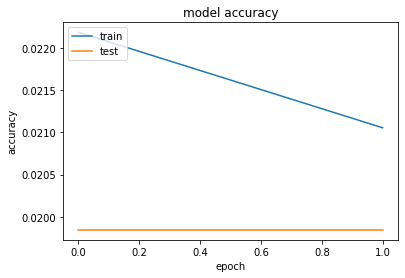

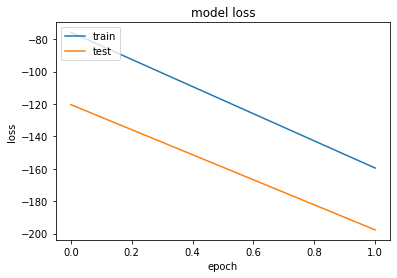

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()